### Setup and experiment code

In [1]:
using Distributions
using PyPlot

include("../src/HistogramApproximation.jl")
include("../src/PrivateKolmogorov.jl")
include("../src/PrivateLearning.jl")

using .HistogramApproximation
using .PrivateKolmogorov
using .PrivateLearning

## Setup

Let's create a test distribution with variable domain size:
- The first parameter is a truncated continuous distribution.
- The second parameter the discrete domain size.

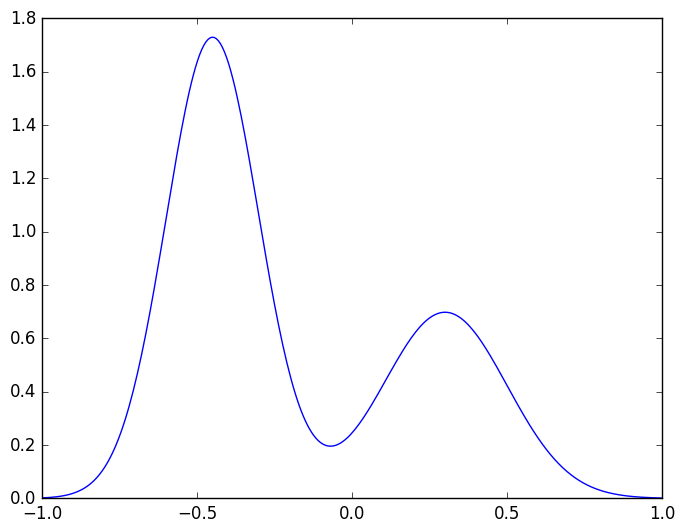

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bac5dd0>

In [2]:
domain_size = 100000000
d_continuous = Truncated(MixtureModel(Normal, [(-.45, .15), (.3, .2)], [0.65, 0.35]), -1, 1)
d = ContinuousTestDistribution(d_continuous, domain_size)

xs = linspace(d_continuous.lower, d_continuous.upper, 300)
ys = pdf(d_continuous, xs)
plot(xs, ys)

## First experiment

We test with $10^6$ samples.

In [3]:
n = 1000000
k = 20
num_mc_points = 1000000   # Number of samples for Monte Carlo estimation of the L_1-difference.

sample = draw_sample(d, n)

hist_est = HistogramEstimator(k)
priv_hist_est = PrivateHistogramEstimator(k, 1.0, 20)

PrivateLearning.PrivateHistogramEstimator(20,1.0,20)

Run the non-private density estimator and compute the $L_1$-error.

In [4]:
res1 = estimate_density(hist_est, sample)
err1 = compute_l1_error(d, res1, num_mc_points)

0.08481597700610256

Run the private density estimator and compute the $L_1$-error.

In [5]:
res2 = estimate_density(priv_hist_est, sample)
err2 = compute_l1_error(d, res2, num_mc_points)

0.0864915797624194

Let's look at the estimates.

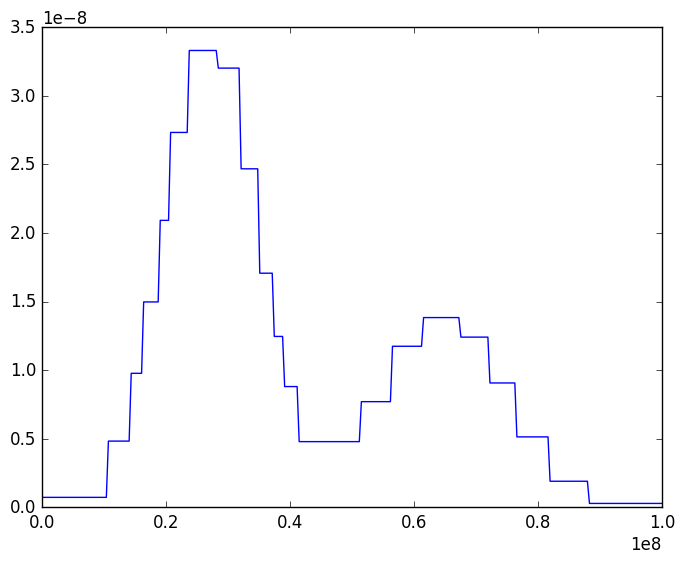

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x309edc6d0>

In [6]:
xs, ys = get_histogram_plotting_data(res1, 300)
plot(xs, ys)

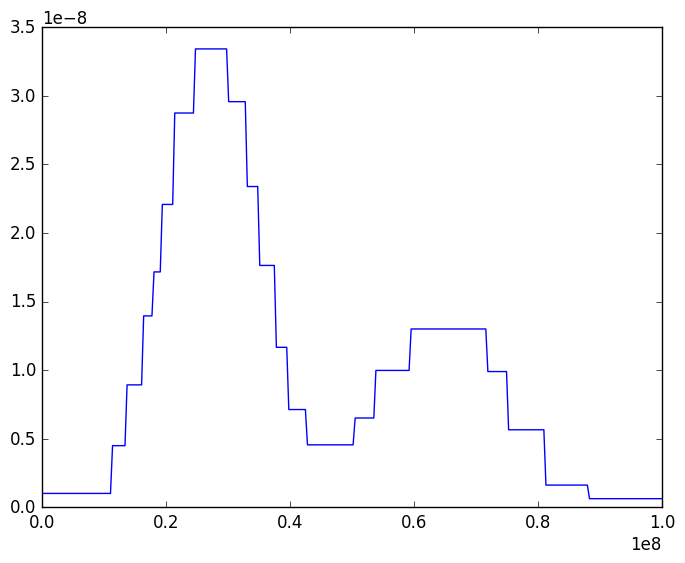

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x30a003810>

In [7]:
xs, ys = get_histogram_plotting_data(res2, 300)
plot(xs, ys)

## Second experiment
Next, we repeat the experiment with $10^5$ samples.

In [8]:
n = 100000
sample = draw_sample(d, n)
res1 = estimate_density(hist_est, sample)
err1 = compute_l1_error(d, res1, num_mc_points)

0.08707744343297621

In [9]:
res2 = estimate_density(priv_hist_est, sample)
err2 = compute_l1_error(d, res2, num_mc_points)

0.20603408610513524

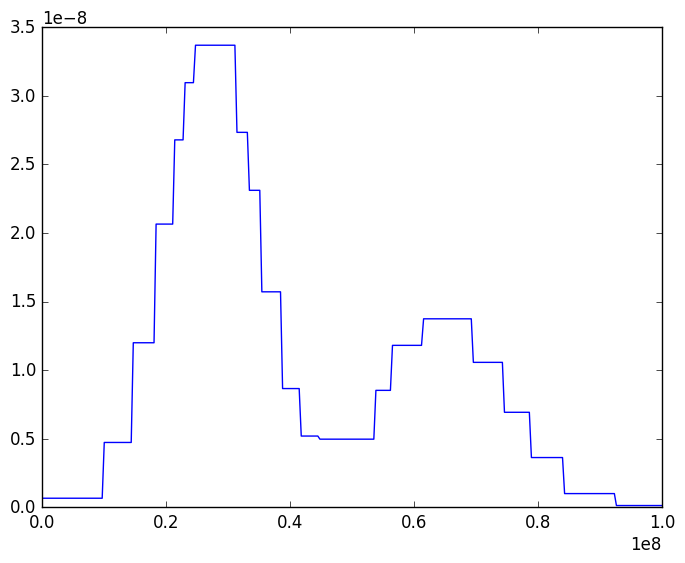

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x318c4f550>

In [10]:
xs, ys = get_histogram_plotting_data(res1, 300)
plot(xs, ys)

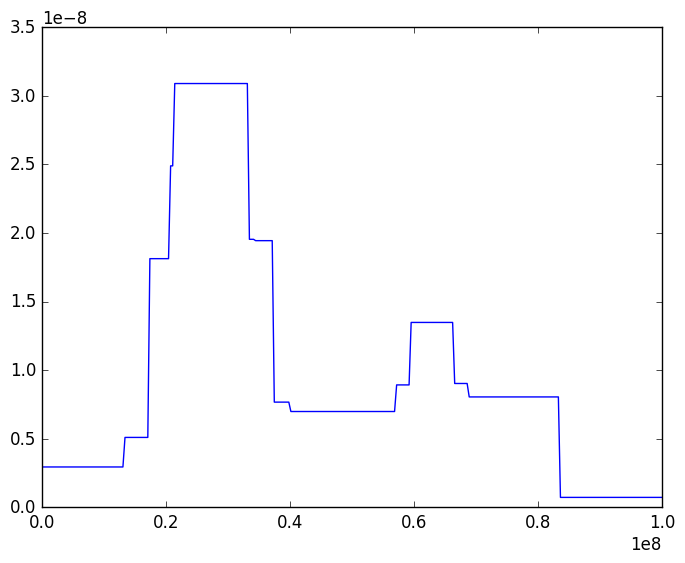

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c559e10>

In [11]:
xs, ys = get_histogram_plotting_data(res2, 300)
plot(xs, ys)

### Better parameters
Let's see if fewer steps of the maximum error rule help in this regime (10 instead of 20 as before).

In [12]:
priv_hist_est_10 = PrivateHistogramEstimator(k, 1.0, 10)
res3 = estimate_density(priv_hist_est_10, sample)
err3 = compute_l1_error(d, res3, num_mc_points)

0.1366693891548681

Yes, they do!

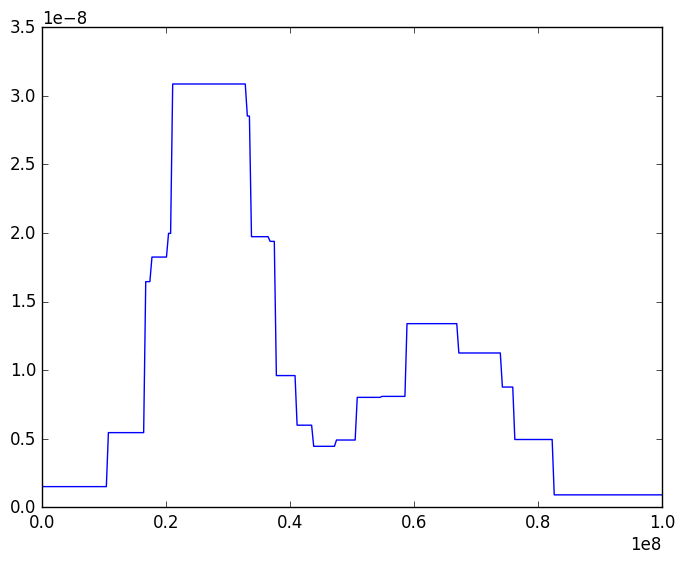

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x30a02c510>

In [13]:
xs, ys = get_histogram_plotting_data(res3, 300)
plot(xs, ys)

## Third experiment
Now $31600$ samples. We also reduce the number of MERR steps to 5.

In [14]:
n = 31600
sample = draw_sample(d, n)
res1 = estimate_density(hist_est, sample)
err1 = compute_l1_error(d, res1, num_mc_points)

0.08659299365159982

In [15]:
priv_hist_est_5 = PrivateHistogramEstimator(k, 1.0, 5)
res2 = estimate_density(priv_hist_est_5, sample)
err2 = compute_l1_error(d, res2, num_mc_points)

0.20561886296899443

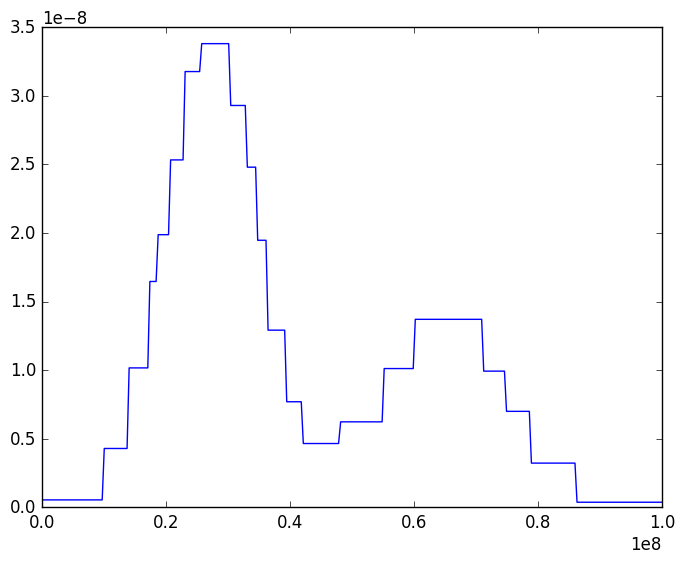

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31becdcd0>

In [16]:
xs, ys = get_histogram_plotting_data(res1, 300)
plot(xs, ys)

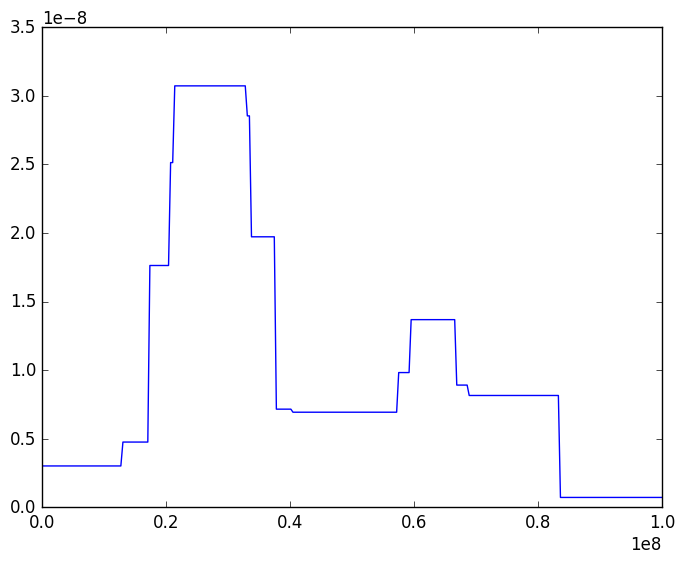

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bf8d5d0>

In [17]:
xs, ys = get_histogram_plotting_data(res2, 300)
plot(xs, ys)

## Fourth experiment
Finally $10^4$ samples.

In [18]:
n = 10000
sample = draw_sample(d, n)
res1 = estimate_density(hist_est, sample)
err1 = compute_l1_error(d, res1, num_mc_points)

0.09456691450925549

In [19]:
res2 = estimate_density(priv_hist_est_5, sample)
err2 = compute_l1_error(d, res2, num_mc_points)

0.3329833057881219

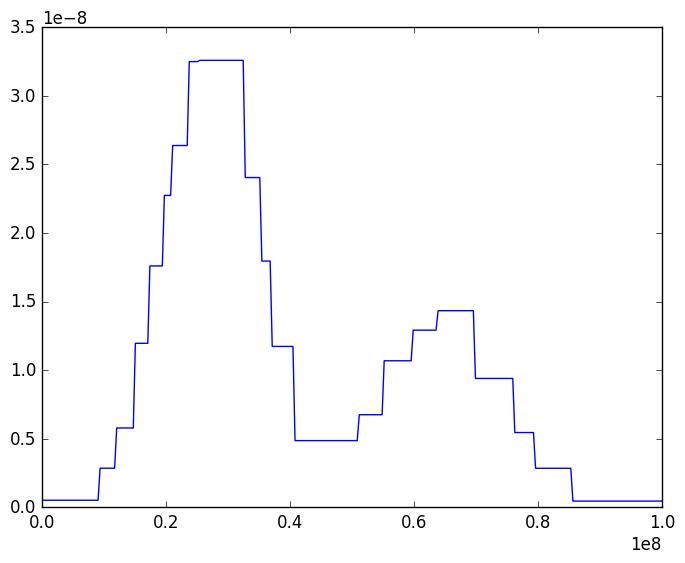

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x309f88c90>

In [20]:
xs, ys = get_histogram_plotting_data(res1, 300)
plot(xs, ys)

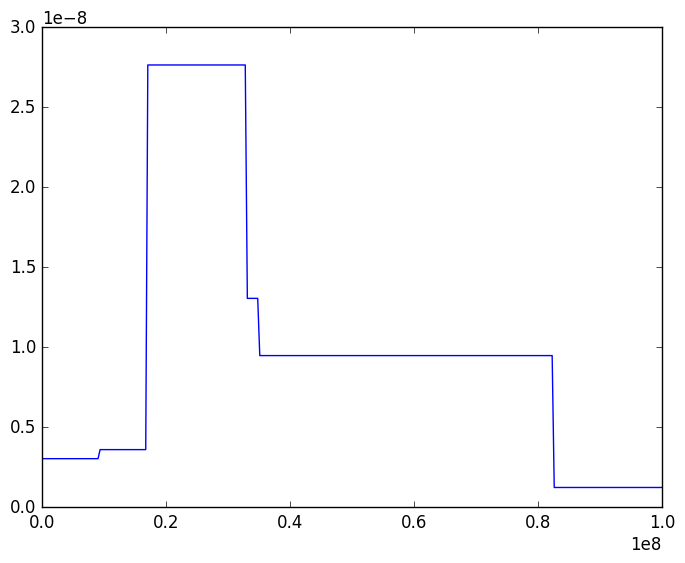

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c0e4590>

In [21]:
xs, ys = get_histogram_plotting_data(res2, 300)
plot(xs, ys)